154003.04
1885.68
[120500.   121002.08 121506.26 122012.54 122520.93 123031.43 123544.06
 124058.83 124575.74 125094.81 125616.04 126139.44 126665.02 127192.79
 127722.76 128254.94 128789.34 129325.96 129864.82 130405.92 130949.28
 131494.9  132042.8  132592.98 133145.45 133700.22 134257.3  134816.71
 135378.45 135942.53 136508.96 137077.75 137648.91 138222.45 138798.38
 139376.71 139957.45 140540.61 141126.2  141714.23 142304.71 142897.65
 143493.06 144090.95 144691.33 145294.21 145899.6  146507.51 147117.96
 147730.95 148346.5  148964.61 149585.3  150208.57 150834.44 151462.92
 152094.02 152727.74 153364.11 154003.13]
[ 1200.    2385.31  3555.78  4711.26  5851.6   6976.65  8086.26  9180.27
 10258.53 11320.88 12367.16 13397.2  14410.85 15407.94 16388.31 17351.79
 18298.21 19227.41 20139.2  21033.42 21909.89 22768.43 23608.86 24431.
 25234.67 26019.68 26785.85 27532.99 28260.91 28969.41 29658.3  30327.39
 30976.48 31605.36 32213.84 32801.71 33368.77 33914.8  34439.6  34942.96
 35424.66

Text(0, 0.5, 'Skumulowana wartość w PLN')

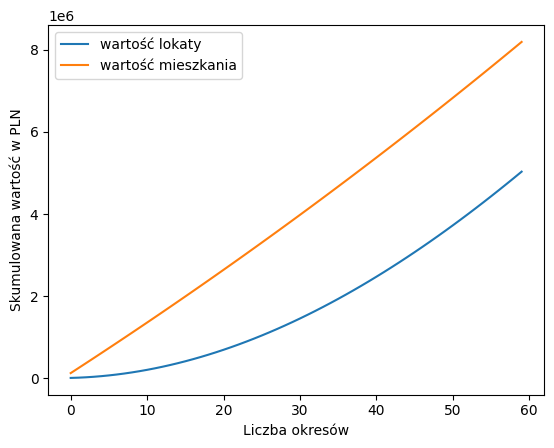

In [19]:
import numpy as np
import numpy_financial as npf

rate1=0.05
rate2=0.12
years=5
pv = -120000
nper=60
periods = np.arange(1,nper+1,dtype=int)

fv = np.around(npf.fv(rate1/12,nper,0,pv),2)
print(fv)

payment= np.around(-npf.pmt(rate2/12,nper,0,fv),2)
print(payment)

inflation_fv=np.around(npf.ipmt(rate1/12,periods,nper,pv,fv),2)
cum_fv=np.cumsum(inflation_fv)[:60]
future_value= -pv +cum_fv
print(future_value)

future_interests= - np.around(-npf.ipmt(rate2/12,periods,nper,pv),2)
cum_interests=np.cumsum(future_interests)[:60]
print(cum_interests)

future_payments= payment*periods + cum_interests
print(future_payments)

import matplotlib.pyplot as plt

plt.plot(future_payments.cumsum(),label='wartość lokaty')
plt.plot(future_value.cumsum(),label='wartość mieszkania')
plt.legend()
plt.xlabel('Liczba okresów')
plt.ylabel('Skumulowana wartość w PLN')
